# Modelo de analise e previsão de supermecado usando catboost

Esse problema consiste em adquirir uma base de dados de um supermercado, analisar os produtos vendidos e desenvolver um modelo de analise preditiva para determinar quais produtos serão os mais vendidos e em quais lojas(outlets) além de outras análises.

In [42]:
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from catboost import CatBoostRegressor
import plotly.express as px
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from ydata_profiling import ProfileReport

In [44]:
pathtrain = 'train_XnW6LSF.csv'
pathtest = 'test_FewQE9B.csv'

df_train = pd.read_csv(pathtrain)
df_test = pd.read_csv(pathtest)

In [45]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [46]:
profile = ProfileReport(df_train,title = 'Profile Report Train', explorative = True)
profile.to_file('output_train.html')
profile.to_widgets

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\Suporte\anaconda3\Lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning:

There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'Low Fat'')



Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<bound method ProfileReport.to_widgets of >

In [47]:
profile = ProfileReport(df_test, title = 'Profile Report Test',explorative = True)
profile.to_file('output_test.html')
profile.to_widgets

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\Suporte\anaconda3\Lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning:

There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'Low Fat'')



Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<bound method ProfileReport.to_widgets of >

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df_train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df_train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [8]:
df_train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [9]:
df_train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [10]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<Axes: xlabel='count', ylabel='Item_Type'>

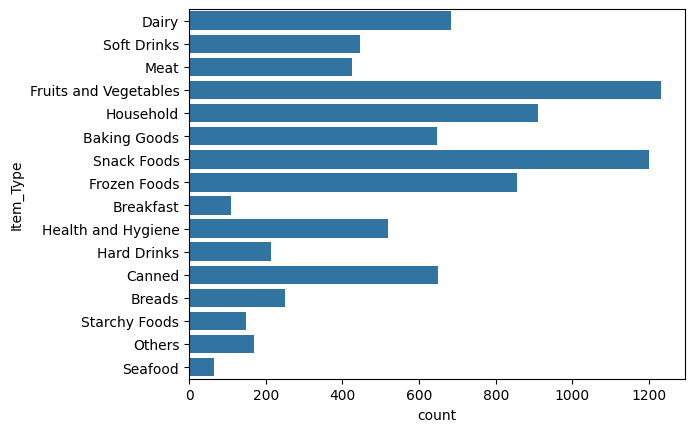

In [11]:
sn.countplot(df_train.Item_Type)

<Axes: xlabel='count', ylabel='Item_Fat_Content'>

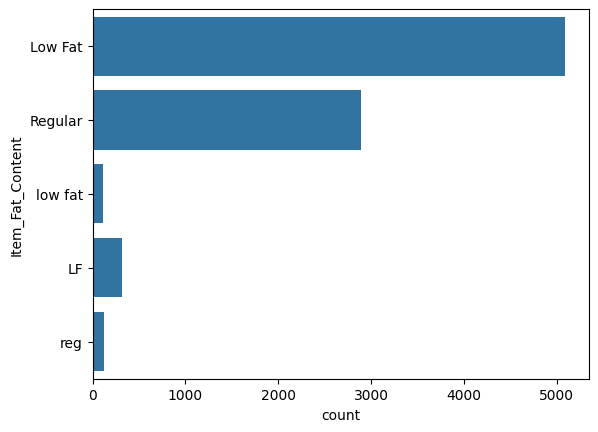

In [12]:
sn.countplot(df_train.Item_Fat_Content)

<Axes: xlabel='count', ylabel='Outlet_Type'>

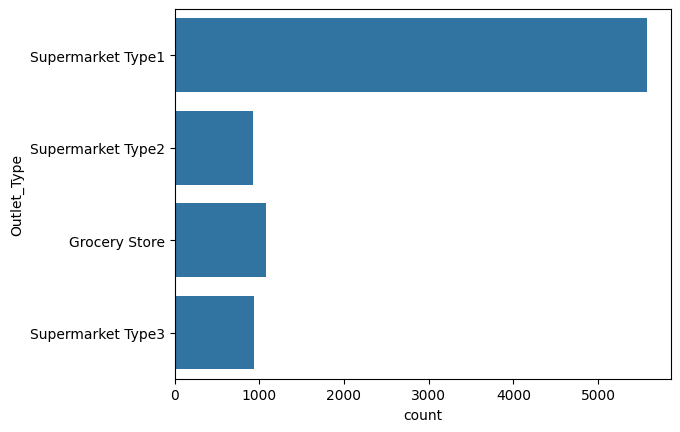

In [13]:
sn.countplot(df_train.Outlet_Type)

<Axes: ylabel='Item_Outlet_Sales'>

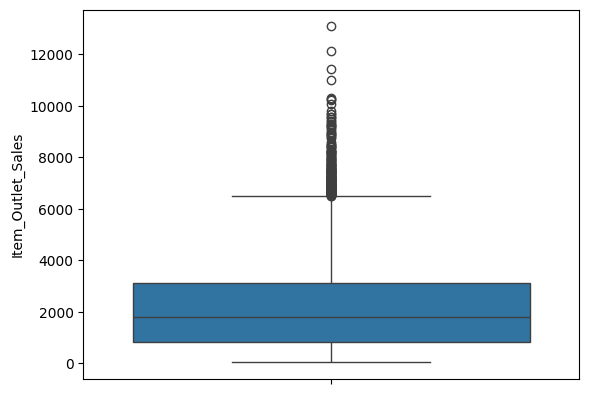

In [14]:
sn.boxplot(df_train.Item_Outlet_Sales)

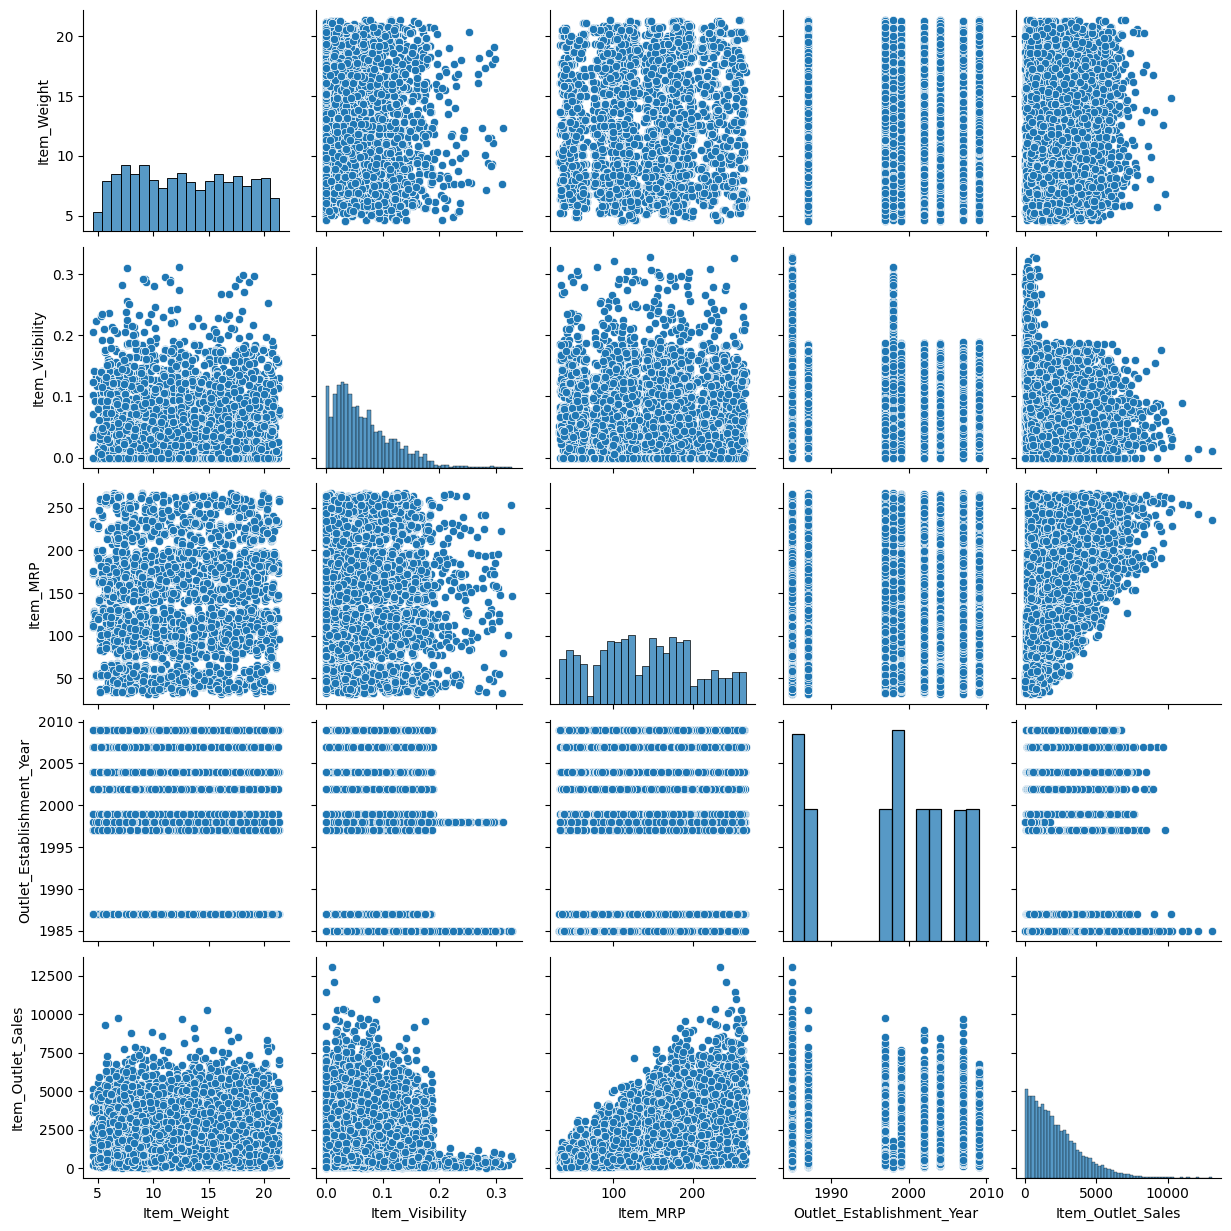

In [15]:
sn.pairplot(df_train)

In [16]:
df_train.fillna(-999, inplace = True)
df_test.fillna(-999, inplace = True)

In [17]:
x = df_train.drop(['Item_Outlet_Sales'], axis= 1)
y = df_train.Item_Outlet_Sales

In [18]:
x_train, x_validation, y_train, y_validation = train_test_split(x,
                                                                y,
                                                                train_size= 0.7,
                                                                random_state = 7)
categorical_features_indices = np.where(x.dtypes != np.float)[0]

<ipython-input-18-ba1a6da9d220>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices = np.where(x.dtypes != np.float)[0]


In [19]:
model = CatBoostRegressor(iterations = 50,
                          depth = 3,
                          learning_rate = 0.1,
                          loss_function = 'RMSE')
model.fit(x_train,
          y_train,
          cat_features = categorical_features_indices,
          eval_set= (x_validation, y_validation),
          plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1620.1680376	test: 1635.6537958	best: 1635.6537958 (0)	total: 81.2ms	remaining: 3.98s
1:	learn: 1549.5498543	test: 1567.6655130	best: 1567.6655130 (1)	total: 98.4ms	remaining: 2.36s
2:	learn: 1488.8064780	test: 1506.5232208	best: 1506.5232208 (2)	total: 121ms	remaining: 1.89s
3:	learn: 1435.5309961	test: 1456.5717400	best: 1456.5717400 (3)	total: 135ms	remaining: 1.55s
4:	learn: 1390.0985572	test: 1411.7996854	best: 1411.7996854 (4)	total: 150ms	remaining: 1.35s
5:	learn: 1350.2767051	test: 1373.4935581	best: 1373.4935581 (5)	total: 164ms	remaining: 1.2s
6:	learn: 1315.8029758	test: 1339.2691549	best: 1339.2691549 (6)	total: 175ms	remaining: 1.07s
7:	learn: 1285.3892250	test: 1310.3652215	best: 1310.3652215 (7)	total: 190ms	remaining: 996ms
8:	learn: 1261.0448409	test: 1286.9544433	best: 1286.9544433 (8)	total: 197ms	remaining: 898ms
9:	learn: 1238.3634073	test: 1264.4559800	best: 1264.4559800 (9)	total: 208ms	remaining: 834ms
10:	learn: 1216.8530466	test: 1245.3922279	best: 

In [20]:
test_dataframe = pd.DataFrame()

test_dataframe['Item_Id'] = df_test['Item_Identifier']
test_dataframe['Outlet_id'] = df_test['Outlet_Identifier']
test_dataframe['Item_Outlet_Sales'] = model.predict(df_test)

In [21]:
test_dataframe.to_csv('Resultados.csv')

In [22]:
resultpath = '/content/Resultados.csv'
df_result = pd.read_csv(resultpath)

In [23]:
df_result.head()

,Unnamed: 0,Item_Id,Outlet_id,Item_Outlet_Sales
0,0,FDW58,OUT049,1671.091828
1,1,FDW14,OUT017,1327.898521
2,2,NCN55,OUT010,778.697730
3,3,FDQ58,OUT017,2569.229524
4,4,FDY38,OUT027,5829.525057


In [24]:
grafico = px.treemap(df_result, path = ['Item_Id','Item_Outlet_Sales'])
grafico.show()

In [25]:
df_sorted = df_result.sort_values(by = "Item_Outlet_Sales", ascending = False)
top_n = 10
df_result_top = df_sorted.head(top_n)

In [26]:
grafico = px.line(df_result_top, x = 'Item_Id', y = 'Item_Outlet_Sales', title = 'Top 10 produtos mais vendidos'.format(top_n))
grafico.show()

In [27]:
grafico = px.bar(df_result_top,
                 x = 'Item_Id',
                 y = 'Item_Outlet_Sales',
                 title = 'Top 10 produtos mais vendidos'.format(top_n))
grafico.show()

In [28]:
grafico = px.treemap(df_result_top, path = ['Outlet_id', 'Item_Id', 'Item_Outlet_Sales'])
grafico.show()

In [29]:
df_result_lojas = df_result.groupby('Outlet_id')['Item_Outlet_Sales'].sum().reset_index()
df_lojas_sorted = df_result_lojas.sort_values(by = 'Item_Outlet_Sales', ascending = False)

top_10_lojas = df_lojas_sorted.head(10)



In [30]:
grafico = px.bar(top_10_lojas,
                 x = 'Outlet_id',
                 y = 'Item_Outlet_Sales',
                 title = 'Lojas que mais venderam')
grafico.show()